OMER BIN ALI BAJUBAIR \
AML ASSIGNMENT 5

1ST QUESTION

In [ ]:
import pandas as pd
import numpy as np
import csv
import requests
#loading the dataset
CSV_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

with requests.Session() as s:
    download = s.get(CSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter=';')
    # print(cr)

In [ ]:
my_list = list(cr)
#print(my_list)
df = pd.DataFrame(my_list)
df.columns = df.iloc[0]
df= df.drop(df.index[0])
print(df)

0    fixed acidity volatile acidity citric acid residual sugar chlorides  \
1                7             0.27        0.36           20.7     0.045   
2              6.3              0.3        0.34            1.6     0.049   
3              8.1             0.28         0.4            6.9      0.05   
4              7.2             0.23        0.32            8.5     0.058   
5              7.2             0.23        0.32            8.5     0.058   
...            ...              ...         ...            ...       ...   
4894           6.2             0.21        0.29            1.6     0.039   
4895           6.6             0.32        0.36              8     0.047   
4896           6.5             0.24        0.19            1.2     0.041   
4897           5.5             0.29         0.3            1.1     0.022   
4898             6             0.21        0.38            0.8      0.02   

0    free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
1            

In [ ]:
df.iloc[:, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8
2,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5
3,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4894,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.5,11.2
4895,6.6,0.32,0.36,8,0.047,57,168,0.9949,3.15,0.46,9.6
4896,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4
4897,5.5,0.29,0.3,1.1,0.022,20,110,0.98869,3.34,0.38,12.8


In [ ]:
df.iloc[ :, -1]

1       6
2       6
3       6
4       6
5       6
       ..
4894    6
4895    5
4896    6
4897    7
4898    6
Name: quality, Length: 4898, dtype: object

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# A random forest is a meta estimator that fits a number of classifying decision trees on
# various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

#train test split
from sklearn.model_selection import train_test_split
X, y = df.iloc[:, :-1], df.iloc[ :, -1]
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

#training using RandomForestRegressor
rf= RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)
print("Training Score:{:.3f}".format(rf.score(X_train, y_train)))
print("Validation Score:{:.3f}".format(rf.score(X_val, y_val)))
print("Testing Score:{:.3f}".format(rf.score(X_test, y_test)))

Training Score:0.893
Validation Score:0.421
Testing Score:0.448


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# RandomizedSearchCV for tuning parameters where R square scoring is used
# Randomized search on hyper parameters.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, scoring="r2", n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
#improved accuracy by tuning the model
print("Training Score:{:.3f}".format(rf_random.score(X_train, y_train)))
print("Validation Score:{:.3f}".format(rf_random.score(X_val, y_val)))
print("Testing Score:{:.3f}".format(rf_random.score(X_test, y_test)))

Training Score:0.931
Validation Score:0.486
Testing Score:0.520


2nd QUESTION

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

Text(0.5, 0, 'Permutation Importance')

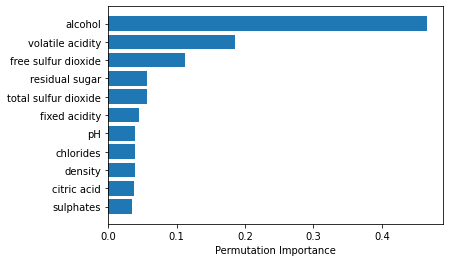

In [ ]:
#permutation feature importance for model interpretation
# The permutation_importance function calculates the feature importance of estimators for a given dataset. 
# The n_repeats parameter sets the number of times a feature is randomly shuffled and returns a sample of feature importances.

feature_names=X_train.columns
#print(feature_names) denotes  column names
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

3RD QUESTION

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 25.8 MB/s 


In [ ]:
import shap
# SHAP is a Python library that uses Shapley values to explain the output of any machine learning model.

In [ ]:
#shap for interpre single sample
shap.initjs()


In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

In [ ]:
#first sample interpret
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)


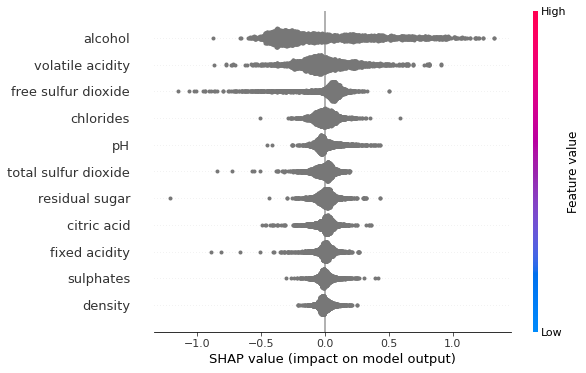

In [ ]:
#overall summary of the mpdel
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)

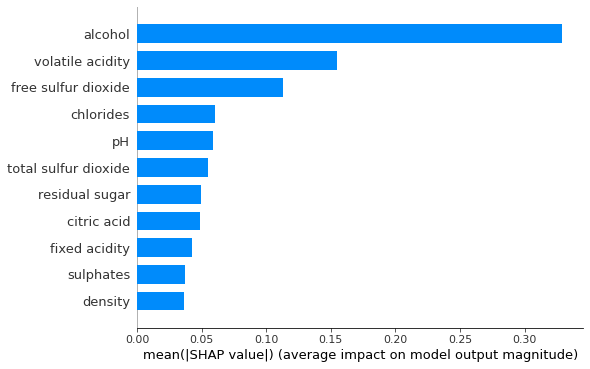

In [ ]:
#overall summary using box plot
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

4TH QUESTION

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


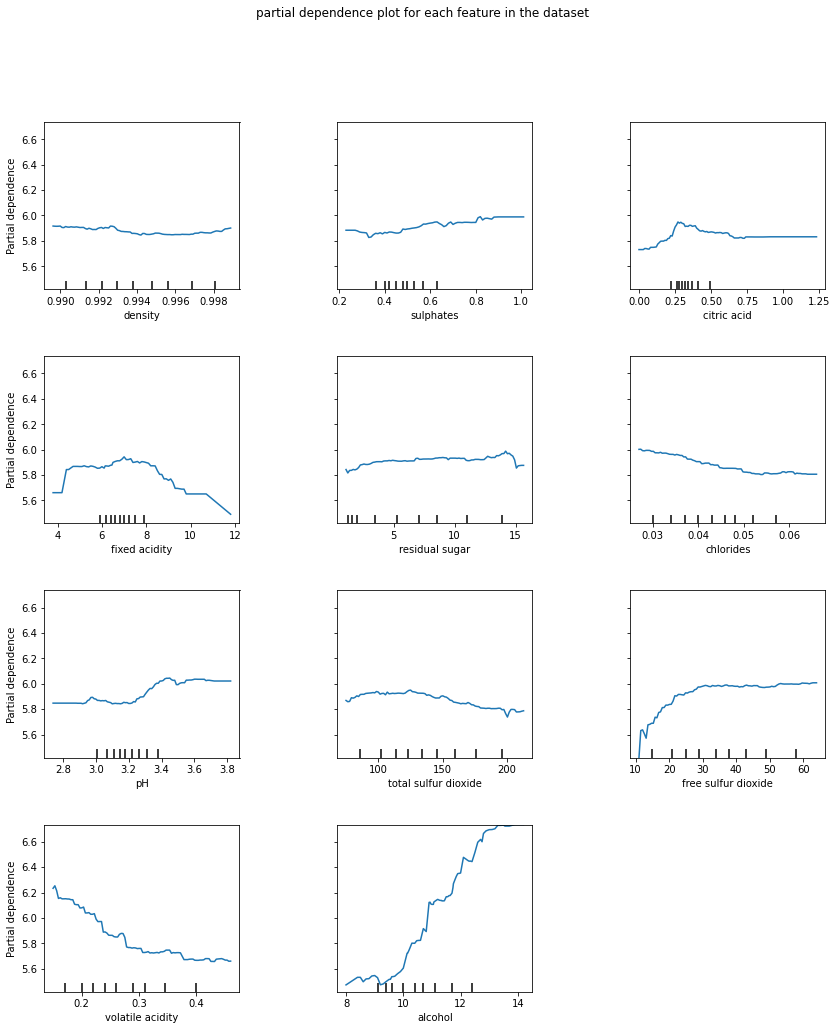

In [ ]:
#4th question
#partial dependency plot for finding relation of each feature with target

from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(rf, X_train.astype('float'), np.argsort(rf.feature_importances_)[-11:], feature_names=X_val.columns)
fig= plt.gcf()
fig.set_size_inches(14, 16)
fig.suptitle('partial dependence plot for each feature in the dataset')
fig.subplots_adjust(wspace=0.5, hspace=0.4)

5TH QUESTION

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


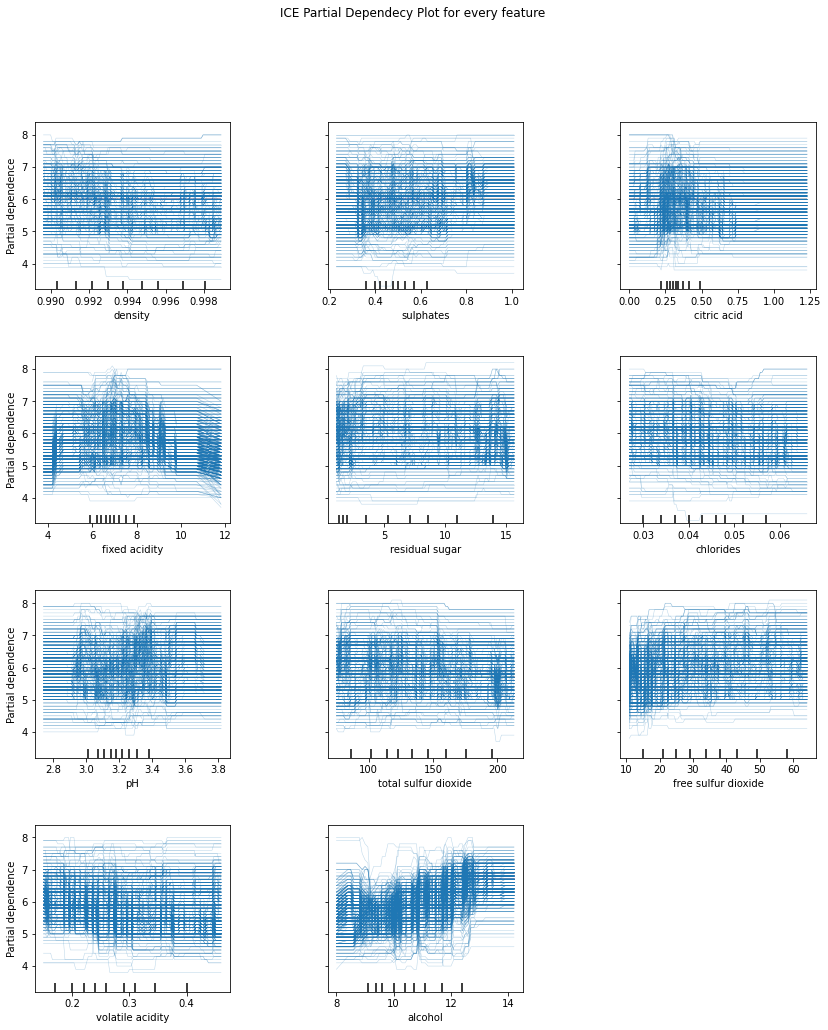

In [ ]:
#ICE plot for every instance
# Individual Conditional Expectation (ICE) plots display one line per instance that shows how the instance’s prediction changes when a feature changes.

plot_partial_dependence(rf, X_train.astype('float'), np.argsort(rf.feature_importances_)[-11:],  kind='individual')
fig= plt.gcf()
fig.set_size_inches(14, 16)
fig.suptitle('ICE Partial Dependecy Plot for every feature')
fig.subplots_adjust(wspace=0.5, hspace=0.4)

6TH QUESTION


In question 1, base validation and testing accuracy from randomForestRegressor increase by tuning the model for various parameters using R square method. Random forest is an ensemble learning algorithm based on decision tree learners. The estimator fits multiple decision trees on randomly extracted subsets from the dataset and averages their prediction.


In question 2, model interpretation has been done where permutation feature importance applied to find the ranking of the overall features of the model according to there influence on the target value. The permutation_importance function calculates the feature importance of estimators for a given dataset. The n_repeats parameter sets the number of times a feature is randomly shuffled and returns a sample of feature importances.


In question 3, shap is used for interpreting the samples. Shap value helps us quantify feature’s contribution towards a prediction. Shap value closer to zero means the feature contributes little to the prediction whereas shap value away from zero indicates the feature contributes more. The fixed acidity, critic acidity and volatile acidity increase the prediction  where acohol, density and sulphates decrease the prediction. Among them volatile acidity and alcohol have the highest effect (large window size). Overall summary also has been shown by shap where alcohol and volatile acidity showed great impact on feature value.

In question 4, A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex. For example, when applied to a linear regression model, partial dependence plots always show a linear relationship. Partial dependency plot is used to find the relation of every feature with the target feature where alcohol showed highly positive relation nut fixed acidity showed negative relative after value 8.


In question 5, An ICE plot visualizes the dependence of the prediction on a feature for each instance separately, resulting in one line per instance, compared to one line overall in partial dependence plots. A PDP is the average of the lines of an ICE plot. ICE plot for every sample showed the model heterogeneity where critic acid, pH, Sulphates showed most of the samples density in a certain region means they have influenceon the targer only in that region. Similarly, alcohol from 9 to 13 increases the quality where less than 9 and more than 13 of alcohol have very little effect on quality.